In [1]:
print('hello world')

hello world


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("henryshan/a-dataset-of-666000-chord-progressions")

print("Path to dataset files:", path)

100%|██████████| 35.3M/35.3M [00:03<00:00, 12.2MB/s]

Extracting files...


Path to dataset files: /Users/reginaldo/.cache/kagglehub/datasets/henryshan/a-dataset-of-666000-chord-progressions/versions/1


In [5]:
import shutil
from python.shared.paths import get_project_root

# Move a file
shutil.move(path, f"{get_project_root()}/data/progressions.csv")

'/Users/reginaldo/code/music/data-exploration/data/progressions.csv'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re

# Set up plotting style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [12]:
# Load the dataset
csv_path = f"{get_project_root()}/data/progressions.csv/chordonomicon.csv"
df = pd.read_csv(csv_path)


/var/folders/p_/165gv2m10cs0717ht7k4kgx80000gp/T/ipykernel_10125/321792116.py:3: DtypeWarning: Columns (0: release_date, 1: genres, 2: main_genre, 3: rock_genre) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [13]:

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head(10)

Dataset shape: (667858, 9)

Columns: ['id', 'chords', 's_artist', 'release_date', 'genres', 'decade', 'main_genre', 'rock_genre', 'parts']

First few rows:


,id,chords,s_artist,release_date,genres,decade,main_genre,rock_genre,parts
0,1,<intro_1> C <verse_1> F C E7 Amin C F C G7 C F...,artist_0,1977,classic country pop,1970.0,pop,NaN,yes
1,2,<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs...,artist_1,2003-01-01,"alternative metal""alternative rock""nu metal""pe...",2000.0,metal,pop rock,yes
2,3,<intro_1> D Dmaj7 D Dmaj7 <verse_1> Emin A D G...,artist_2,2022-09-23,NaN,2020.0,NaN,NaN,yes
3,4,<intro_1> C <verse_1> G C G C <chorus_1> F Dmi...,artist_3,2023-02-10,modern country pop,2020.0,pop,NaN,yes
4,5,<intro_1> C G C G <verse_1> C G C G C Bmin Emi...,artist_4,2018-08-24,"classic opm""opm",2010.0,NaN,NaN,yes
5,6,<intro_1> G Bmin Amin D G Bmin <verse_1> Amin ...,artist_3,2023-02-10,modern country pop,2020.0,pop,NaN,yes
6,7,<intro_1> Fsmin Fsno3d Bno3d E/B Fsno3d Bno3d ...,artist_5,2023-02-10,"french pop""nouvelle chanson francaise",2020.0,pop,NaN,yes
7,8,<chorus_1> C Amin Dmin G C G Amin Dmin G C <ve...,artist_3,2023-02-10,modern country pop,2020.0,pop,NaN,yes
8,9,<chorus_1> Amin G F G Amin Fmaj7 Amin G Amin G...,artist_6,2022-05-13,"diva house""eurodance""german techno""hip house",2020.0,electronic,NaN,yes
9,10,<intro_1> Cmaj7 C Cmaj7 C <verse_1> G D Emin D...,artist_3,2023-02-10,modern country pop,2020.0,pop,NaN,yes


## Basic Dataset Statistics

In [14]:
# Basic info
print("=== DATASET OVERVIEW ===\n")
print(f"Total progressions: {len(df):,}")
print(f"\nMissing values per column:")
print(df.isnull().sum())
print(f"\nData types:")
print(df.dtypes)

=== DATASET OVERVIEW ===

Total progressions: 667,858

Missing values per column:
id                   0
chords               0
s_artist             0
release_date    229049
genres          303585
decade          229049
main_genre      389933
rock_genre      546447
parts                0
dtype: int64

Data types:
id                int64
chords              str
s_artist            str
release_date        str
genres              str
decade          float64
main_genre          str
rock_genre          str
parts               str
dtype: object


In [15]:
# Genre distribution
print("=== GENRE DISTRIBUTION ===\n")
print("Main genres:")
print(df['main_genre'].value_counts())
print(f"\nTotal unique main genres: {df['main_genre'].nunique()}")
print(f"Progressions with no main genre: {df['main_genre'].isnull().sum()}")

=== GENRE DISTRIBUTION ===

Main genres:
main_genre
pop            66680
rock           63228
country        36070
pop rock       30871
alternative    29299
punk           19221
rap             8663
metal           8104
soul            5964
jazz            4620
reggae          2690
electronic      2515
Name: count, dtype: int64

Total unique main genres: 12
Progressions with no main genre: 389933


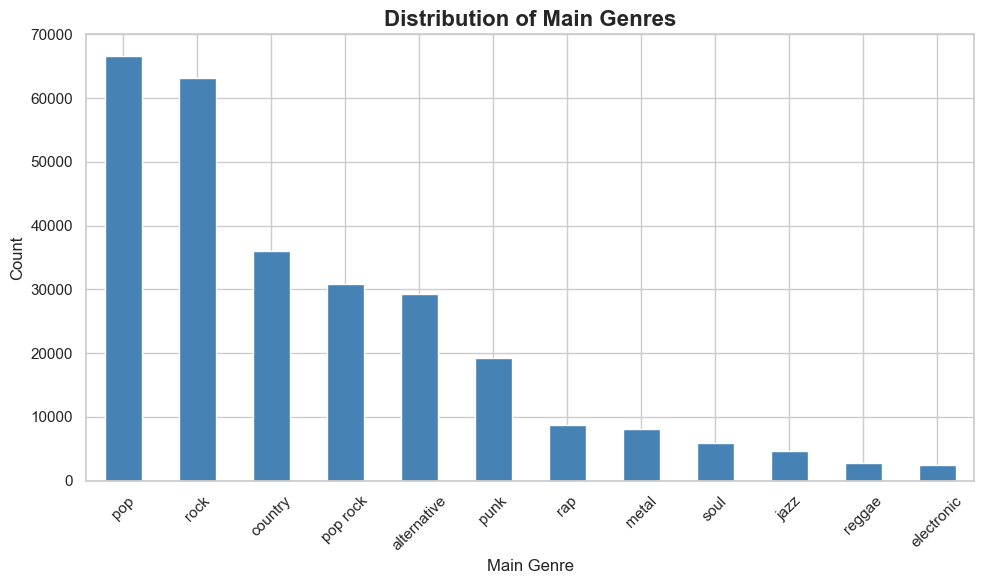

In [16]:
# Visualize main genre distribution
fig, ax = plt.subplots(figsize=(10, 6))
genre_counts = df['main_genre'].value_counts()
genre_counts.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Distribution of Main Genres', fontsize=16, fontweight='bold')
ax.set_xlabel('Main Genre', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

=== DECADE DISTRIBUTION ===

decade
1890.0         1
1900.0        33
1910.0         6
1920.0        43
1930.0        69
1940.0        95
1950.0      1585
1960.0      8082
1970.0     15494
1980.0     17213
1990.0     40256
2000.0     92190
2010.0    176809
2020.0     86933
Name: count, dtype: int64


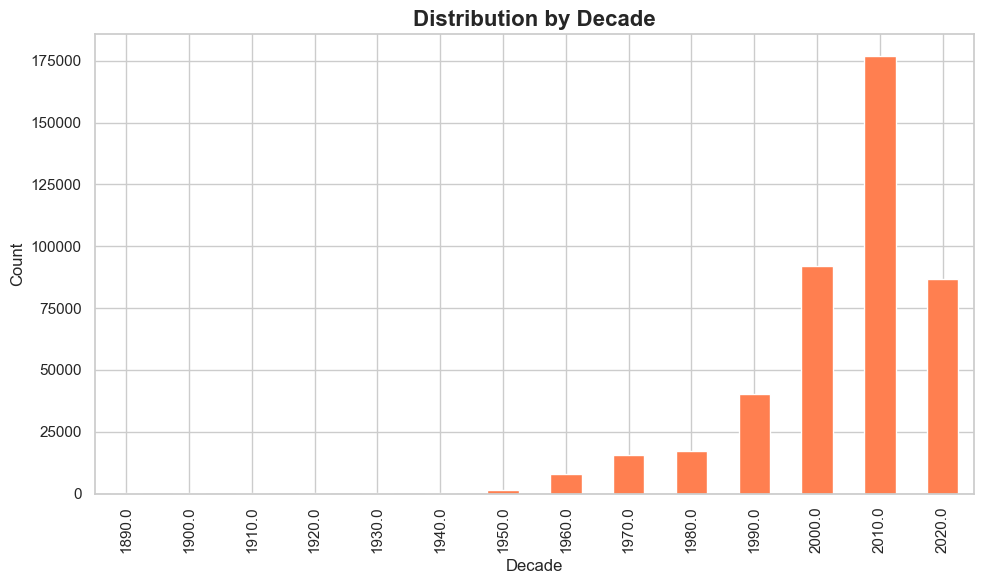

In [17]:
# Decade distribution
print("=== DECADE DISTRIBUTION ===\n")
print(df['decade'].value_counts().sort_index())

fig, ax = plt.subplots(figsize=(10, 6))
decade_counts = df['decade'].value_counts().sort_index()
decade_counts.plot(kind='bar', ax=ax, color='coral')
ax.set_title('Distribution by Decade', fontsize=16, fontweight='bold')
ax.set_xlabel('Decade', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
# Parts/structure labeling
print("=== STRUCTURE LABELING ===\n")
print(df['parts'].value_counts())
print(f"\nPercentage with structure labels: {(df['parts'] == 'yes').sum() / len(df) * 100:.1f}%")

=== STRUCTURE LABELING ===

parts
yes    403923
no     263935
Name: count, dtype: int64

Percentage with structure labels: 60.5%


## Chord Parsing & Analysis

In [19]:
def parse_progression(progression_str):
    """
    Parse a progression string and extract individual chords.
    Removes structure tags like <intro_1>, <verse_1>, etc.
    Returns list of chords in order.
    """
    if pd.isna(progression_str):
        return []
    
    # Remove structure tags
    cleaned = re.sub(r'<[^>]+>', '', progression_str)
    
    # Split by whitespace and filter empty strings
    chords = [c.strip() for c in cleaned.split() if c.strip()]
    
    return chords

# Test the parser
test_progression = df.iloc[1]['chords']
print("Test progression (raw):")
print(test_progression[:200] + "...")
print("\nParsed chords:")
print(parse_progression(test_progression)[:20])

Test progression (raw):
<intro_1> E D A/Cs E D A/Cs <verse_1> E D A/Cs E D A/Cs E D A/Cs E D A C <chorus_1> E G D A E G D A E G D A C D E D A/Cs <verse_2> E D A/Cs E D A/Cs E D A/Cs E D A C <chorus_2> E G D A E G D A E G D A...

Parsed chords:
['E', 'D', 'A/Cs', 'E', 'D', 'A/Cs', 'E', 'D', 'A/Cs', 'E', 'D', 'A/Cs', 'E', 'D', 'A/Cs', 'E', 'D', 'A', 'C', 'E']


Parsing all progressions...

Progression length statistics:
count    667858.000000
mean         76.375390
std          54.519361
min           3.000000
25%          47.000000
50%          70.000000
75%          96.000000
max        2549.000000
Name: num_chords, dtype: float64


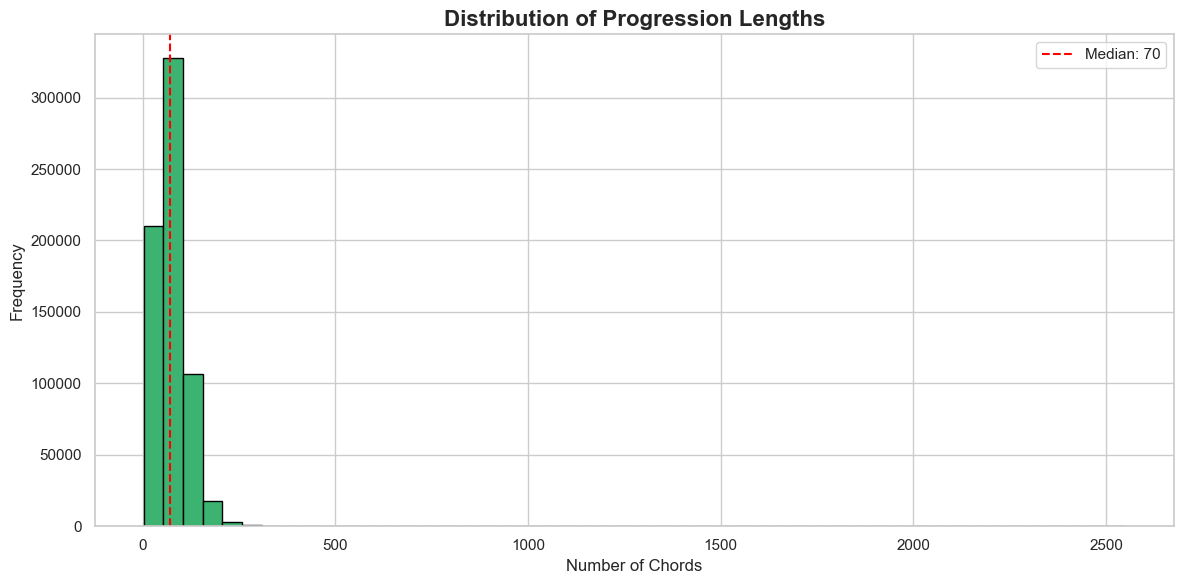

In [20]:
# Parse all progressions (this might take a moment)
print("Parsing all progressions...")
df['parsed_chords'] = df['chords'].apply(parse_progression)
df['num_chords'] = df['parsed_chords'].apply(len)

print(f"\nProgression length statistics:")
print(df['num_chords'].describe())

# Visualize progression lengths
fig, ax = plt.subplots(figsize=(12, 6))
df['num_chords'].hist(bins=50, ax=ax, color='mediumseagreen', edgecolor='black')
ax.set_title('Distribution of Progression Lengths', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Chords', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.axvline(df['num_chords'].median(), color='red', linestyle='--', label=f'Median: {df["num_chords"].median():.0f}')
ax.legend()
plt.tight_layout()
plt.show()

In [21]:
# Collect all chords across the dataset
print("Collecting all chords...")
all_chords = []
for chord_list in df['parsed_chords']:
    all_chords.extend(chord_list)

print(f"\nTotal chord occurrences: {len(all_chords):,}")
print(f"Unique chords: {len(set(all_chords)):,}")

# Top 50 most common chords
chord_counts = Counter(all_chords)
top_50_chords = chord_counts.most_common(50)

print("\n=== TOP 50 MOST COMMON CHORDS ===")
for i, (chord, count) in enumerate(top_50_chords, 1):
    print(f"{i:2d}. {chord:15s} - {count:,} occurrences ({count/len(all_chords)*100:.2f}%)")


Total chord occurrences: 51,007,915
Unique chords: 4,259

=== TOP 50 MOST COMMON CHORDS ===
 1. G               - 6,816,735 occurrences (13.36%)
 2. C               - 5,628,782 occurrences (11.04%)
 3. D               - 5,067,094 occurrences (9.93%)
 4. A               - 3,783,532 occurrences (7.42%)
 5. F               - 3,255,481 occurrences (6.38%)
 6. Amin            - 2,855,784 occurrences (5.60%)
 7. E               - 2,600,228 occurrences (5.10%)
 8. Emin            - 2,572,243 occurrences (5.04%)
 9. Bmin            - 1,395,951 occurrences (2.74%)
10. B               - 1,316,277 occurrences (2.58%)
11. Dmin            - 1,219,884 occurrences (2.39%)
12. Bb              - 981,097 occurrences (1.92%)
13. Fsmin           - 857,801 occurrences (1.68%)
14. Fs              - 659,636 occurrences (1.29%)
15. Csmin           - 594,179 occurrences (1.16%)
16. Gmin            - 534,433 occurrences (1.05%)
17. Eb              - 477,383 occurrences (0.94%)
18. Cmin            - 392,199 occ

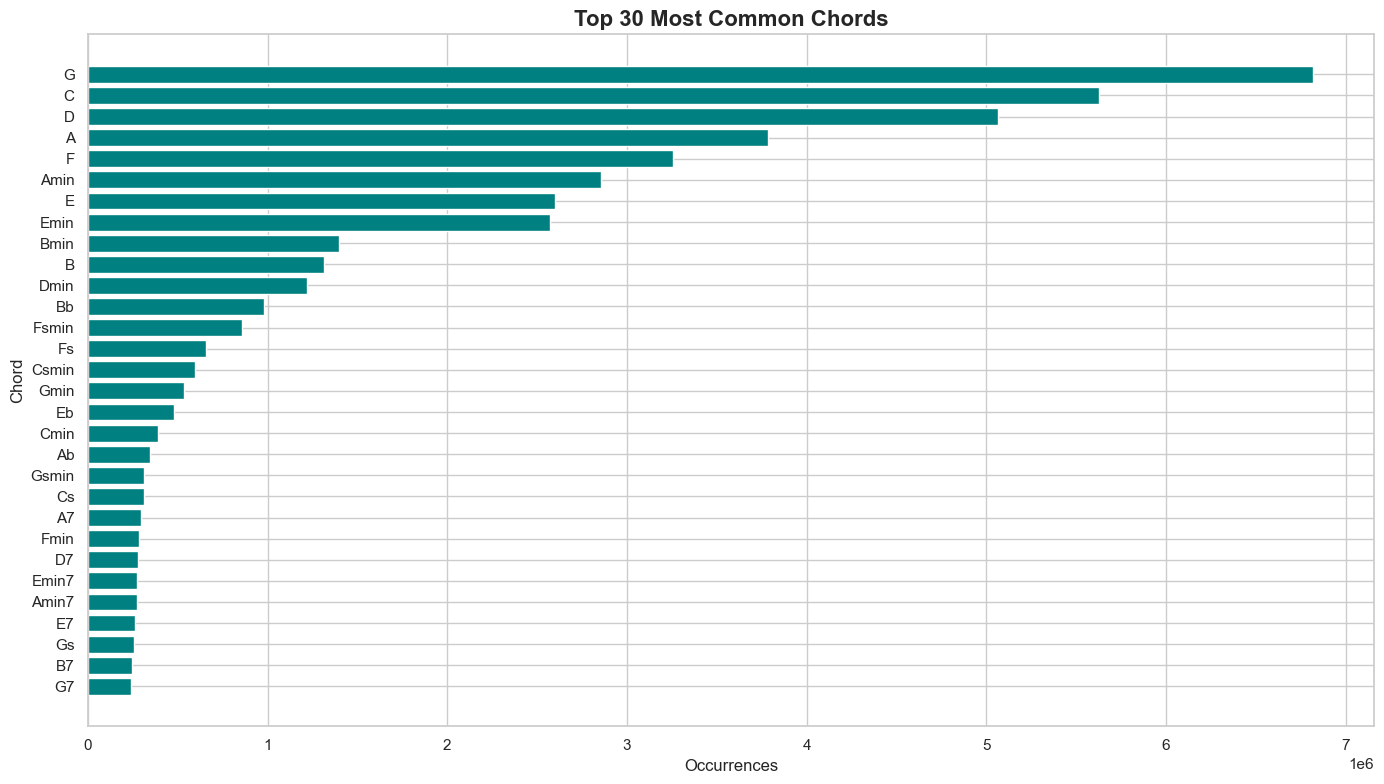

In [22]:
# Visualize top 30 chords
fig, ax = plt.subplots(figsize=(14, 8))
top_30 = chord_counts.most_common(30)
chords, counts = zip(*top_30)
ax.barh(range(len(chords)), counts, color='teal')
ax.set_yticks(range(len(chords)))
ax.set_yticklabels(chords)
ax.invert_yaxis()
ax.set_title('Top 30 Most Common Chords', fontsize=16, fontweight='bold')
ax.set_xlabel('Occurrences', fontsize=12)
ax.set_ylabel('Chord', fontsize=12)
plt.tight_layout()
plt.show()

## Chord Transitions Analysis

In [23]:
# Extract all chord transitions (bigrams)
print("Extracting chord transitions...")
transitions = []

for chord_list in df['parsed_chords']:
    if len(chord_list) < 2:
        continue
    for i in range(len(chord_list) - 1):
        transitions.append((chord_list[i], chord_list[i+1]))

print(f"\nTotal transitions: {len(transitions):,}")
print(f"Unique transitions: {len(set(transitions)):,}")

# Count transitions
transition_counts = Counter(transitions)
top_50_transitions = transition_counts.most_common(50)

print("\n=== TOP 50 MOST COMMON CHORD TRANSITIONS ===")
for i, ((from_chord, to_chord), count) in enumerate(top_50_transitions, 1):
    print(f"{i:2d}. {from_chord:10s} → {to_chord:10s} - {count:,} times ({count/len(transitions)*100:.2f}%)")

Extracting chord transitions...

Total transitions: 50,340,057
Unique transitions: 148,327

=== TOP 50 MOST COMMON CHORD TRANSITIONS ===
 1. C          → G          - 1,824,183 times (3.62%)
 2. G          → D          - 1,491,104 times (2.96%)
 3. G          → C          - 1,470,387 times (2.92%)
 4. D          → G          - 1,258,285 times (2.50%)
 5. F          → C          - 1,101,857 times (2.19%)
 6. D          → A          - 965,981 times (1.92%)
 7. A          → D          - 859,203 times (1.71%)
 8. C          → F          - 782,933 times (1.56%)
 9. A          → E          - 744,486 times (1.48%)
10. C          → D          - 704,138 times (1.40%)
11. G          → Amin       - 699,240 times (1.39%)
12. F          → G          - 696,451 times (1.38%)
13. E          → A          - 661,245 times (1.31%)
14. Emin       → C          - 588,831 times (1.17%)
15. Amin       → F          - 578,999 times (1.15%)
16. D          → C          - 577,035 times (1.15%)
17. G          → F   

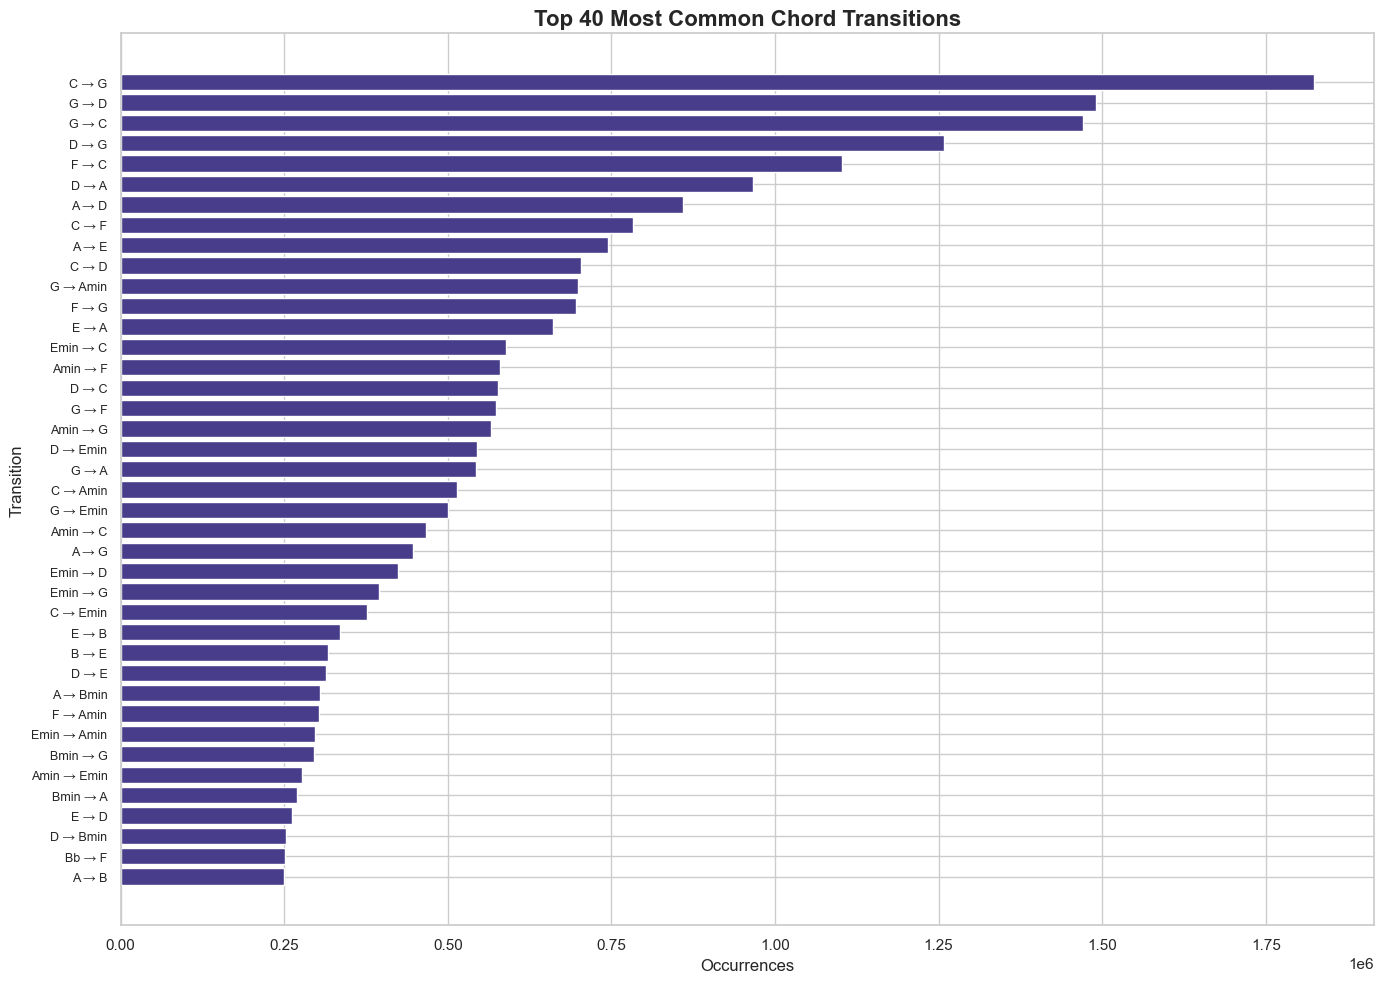

In [24]:
# Visualize top transitions
fig, ax = plt.subplots(figsize=(14, 10))
top_40_trans = transition_counts.most_common(40)
trans_labels = [f"{from_c} → {to_c}" for (from_c, to_c), _ in top_40_trans]
trans_counts = [count for _, count in top_40_trans]

ax.barh(range(len(trans_labels)), trans_counts, color='darkslateblue')
ax.set_yticks(range(len(trans_labels)))
ax.set_yticklabels(trans_labels, fontsize=9)
ax.invert_yaxis()
ax.set_title('Top 40 Most Common Chord Transitions', fontsize=16, fontweight='bold')
ax.set_xlabel('Occurrences', fontsize=12)
ax.set_ylabel('Transition', fontsize=12)
plt.tight_layout()
plt.show()

## Genre-Specific Analysis

In [25]:
# Analyze chord usage by genre
def get_genre_chord_distribution(df, genre, top_n=20):
    """Get top N chords for a specific genre"""
    genre_df = df[df['main_genre'] == genre]
    genre_chords = []
    for chord_list in genre_df['parsed_chords']:
        genre_chords.extend(chord_list)
    return Counter(genre_chords).most_common(top_n)

# Get top genres (excluding NaN)
top_genres = df['main_genre'].value_counts().head(6).index.tolist()

print("=== TOP CHORDS BY GENRE ===\n")
for genre in top_genres:
    if pd.isna(genre):
        continue
    print(f"\n{genre.upper()}:")
    top_chords = get_genre_chord_distribution(df, genre, 10)
    for i, (chord, count) in enumerate(top_chords, 1):
        print(f"  {i:2d}. {chord:10s} - {count:,}")

=== TOP CHORDS BY GENRE ===


POP:
   1. G          - 673,849
   2. C          - 561,953
   3. D          - 490,724
   4. A          - 365,264
   5. F          - 344,082
   6. Amin       - 315,244
   7. Emin       - 280,633
   8. E          - 252,009
   9. Bmin       - 156,673
  10. Dmin       - 144,484

ROCK:
   1. G          - 633,362
   2. C          - 511,061
   3. D          - 507,146
   4. A          - 416,350
   5. F          - 302,297
   6. E          - 281,996
   7. Amin       - 243,928
   8. Emin       - 224,743
   9. B          - 141,257
  10. Bmin       - 130,954

COUNTRY:
   1. G          - 477,707
   2. C          - 383,255
   3. D          - 336,932
   4. A          - 216,043
   5. F          - 194,213
   6. Amin       - 148,968
   7. Emin       - 131,198
   8. E          - 127,992
   9. Bmin       - 63,176
  10. B          - 51,675

POP ROCK:
   1. G          - 310,804
   2. C          - 258,431
   3. D          - 242,433
   4. A          - 195,208
   5. F          - 15

In [26]:
# Genre-specific transitions
def get_genre_transitions(df, genre, top_n=20):
    """Get top N transitions for a specific genre"""
    genre_df = df[df['main_genre'] == genre]
    genre_transitions = []
    
    for chord_list in genre_df['parsed_chords']:
        if len(chord_list) < 2:
            continue
        for i in range(len(chord_list) - 1):
            genre_transitions.append((chord_list[i], chord_list[i+1]))
    
    return Counter(genre_transitions).most_common(top_n)

print("=== TOP TRANSITIONS BY GENRE ===\n")
for genre in top_genres[:3]:  # Just show top 3 genres for brevity
    if pd.isna(genre):
        continue
    print(f"\n{genre.upper()}:")
    top_trans = get_genre_transitions(df, genre, 10)
    for i, ((from_c, to_c), count) in enumerate(top_trans, 1):
        print(f"  {i:2d}. {from_c:10s} → {to_c:10s} - {count:,}")

=== TOP TRANSITIONS BY GENRE ===


POP:
   1. C          → G          - 177,349
   2. G          → D          - 140,861
   3. G          → C          - 138,764
   4. D          → G          - 115,680
   5. F          → C          - 113,978
   6. D          → A          - 91,024
   7. A          → D          - 80,474
   8. C          → F          - 78,464
   9. G          → Amin       - 78,216
  10. F          → G          - 72,485

ROCK:
   1. C          → G          - 160,002
   2. G          → D          - 140,438
   3. G          → C          - 126,820
   4. D          → G          - 114,274
   5. D          → A          - 107,385
   6. F          → C          - 97,781
   7. A          → D          - 90,210
   8. A          → E          - 83,443
   9. E          → A          - 74,338
  10. C          → F          - 70,066

COUNTRY:
   1. C          → G          - 147,642
   2. G          → C          - 124,377
   3. G          → D          - 121,348
   4. D          → G          - 1

## Structure Pattern Analysis

In [27]:
def extract_structure_tags(progression_str):
    """Extract all structure tags from a progression"""
    if pd.isna(progression_str):
        return []
    tags = re.findall(r'<([^>]+)>', progression_str)
    return tags

def parse_progression_with_structure(progression_str):
    """
    Parse progression and maintain structure information.
    Returns dict: {section_name: [chords]}
    """
    if pd.isna(progression_str):
        return {}
    
    sections = {}
    current_section = 'unknown'
    
    # Split by structure tags
    parts = re.split(r'(<[^>]+>)', progression_str)
    
    for part in parts:
        if part.startswith('<') and part.endswith('>'):
            # This is a structure tag
            current_section = part[1:-1]  # Remove < >
            if current_section not in sections:
                sections[current_section] = []
        else:
            # These are chords
            chords = [c.strip() for c in part.split() if c.strip()]
            if current_section in sections:
                sections[current_section].extend(chords)
    
    return sections

# Test structure parsing
test_prog = df.iloc[1]['chords']
print("Test progression structure:")
print(parse_progression_with_structure(test_prog))

Test progression structure:
{'intro_1': ['E', 'D', 'A/Cs', 'E', 'D', 'A/Cs'], 'verse_1': ['E', 'D', 'A/Cs', 'E', 'D', 'A/Cs', 'E', 'D', 'A/Cs', 'E', 'D', 'A', 'C'], 'chorus_1': ['E', 'G', 'D', 'A', 'E', 'G', 'D', 'A', 'E', 'G', 'D', 'A', 'C', 'D', 'E', 'D', 'A/Cs'], 'verse_2': ['E', 'D', 'A/Cs', 'E', 'D', 'A/Cs', 'E', 'D', 'A/Cs', 'E', 'D', 'A', 'C'], 'chorus_2': ['E', 'G', 'D', 'A', 'E', 'G', 'D', 'A', 'E', 'G', 'D', 'A', 'C', 'D'], 'bridge_1': ['E', 'C', 'G', 'D', 'E', 'C', 'G', 'D', 'E', 'C', 'G', 'D', 'C', 'D', 'E', 'G', 'E', 'G', 'D', 'A', 'E', 'G', 'D', 'A', 'E', 'G', 'D', 'A', 'C', 'D'], 'chorus_3': ['E', 'G', 'D', 'A', 'E', 'G', 'D', 'A', 'E', 'G', 'D', 'A', 'C', 'D'], 'bridge_2': ['E', 'C', 'G', 'D', 'E', 'C', 'G', 'D', 'E', 'C', 'G', 'D', 'C', 'D', 'E']}


In [28]:
# Analyze structure tags
print("Extracting structure tags...")
df['structure_tags'] = df['chords'].apply(extract_structure_tags)

# Count all structure types
all_tags = []
for tags in df['structure_tags']:
    all_tags.extend(tags)

tag_counts = Counter(all_tags)
print(f"\n=== STRUCTURE TAG DISTRIBUTION ===")
print(f"Total structure tags: {len(all_tags):,}")
print(f"Unique structure types: {len(set(all_tags)):,}")

# Get base section types (without numbers)
base_sections = [re.sub(r'_\d+$', '', tag) for tag in all_tags]
base_section_counts = Counter(base_sections)

print("\n=== SECTION TYPES (without numbers) ===")
for section, count in base_section_counts.most_common(20):
    print(f"{section:20s} - {count:,}")

Extracting structure tags...

=== STRUCTURE TAG DISTRIBUTION ===
Total structure tags: 2,679,123
Unique structure types: 379

=== SECTION TYPES (without numbers) ===
verse                - 973,805
chorus               - 879,363
intro                - 296,915
bridge               - 185,835
outro                - 149,071
instrumental         - 80,990
interlude            - 73,395
solo                 - 39,746
bridge_chorus        - 1
outro_chorus         - 1
intro_riff           - 1


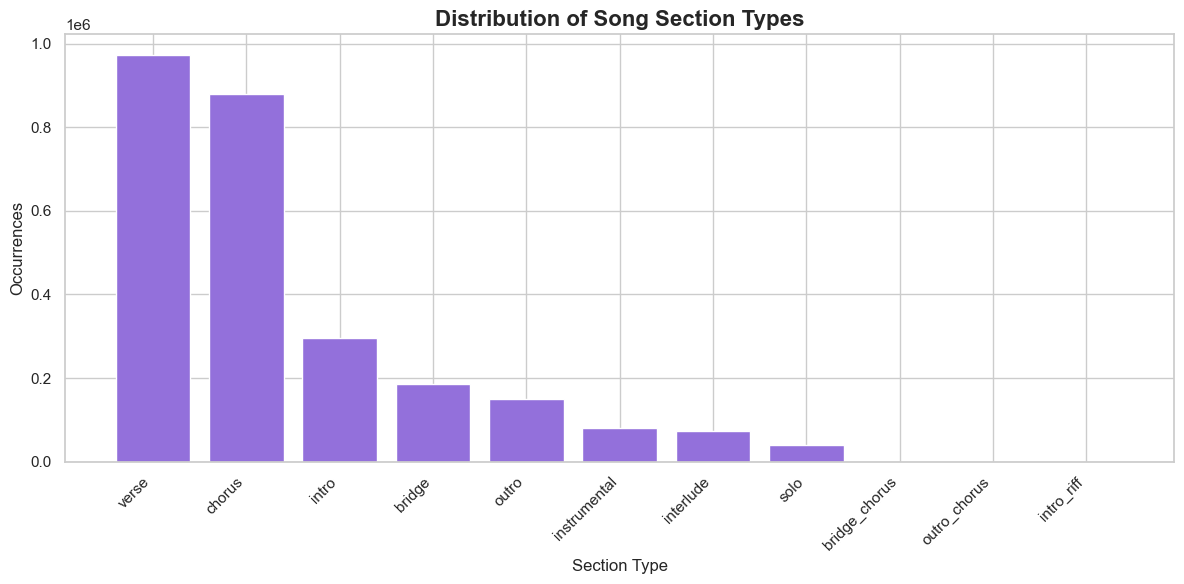

In [29]:
# Visualize section types
fig, ax = plt.subplots(figsize=(12, 6))
top_sections = base_section_counts.most_common(15)
sections, counts = zip(*top_sections)
ax.bar(range(len(sections)), counts, color='mediumpurple')
ax.set_xticks(range(len(sections)))
ax.set_xticklabels(sections, rotation=45, ha='right')
ax.set_title('Distribution of Song Section Types', fontsize=16, fontweight='bold')
ax.set_xlabel('Section Type', fontsize=12)
ax.set_ylabel('Occurrences', fontsize=12)
plt.tight_layout()
plt.show()

## Summary Statistics

In [30]:
print("=" * 80)
print("DATASET SUMMARY")
print("=" * 80)
print(f"\n📊 OVERALL STATISTICS")
print(f"  Total progressions: {len(df):,}")
print(f"  Total chord occurrences: {len(all_chords):,}")
print(f"  Unique chords: {len(set(all_chords)):,}")
print(f"  Total transitions: {len(transitions):,}")
print(f"  Unique transitions: {len(set(transitions)):,}")

print(f"\n🎵 PROGRESSION CHARACTERISTICS")
print(f"  Average progression length: {df['num_chords'].mean():.1f} chords")
print(f"  Median progression length: {df['num_chords'].median():.0f} chords")
print(f"  Shortest progression: {df['num_chords'].min()} chords")
print(f"  Longest progression: {df['num_chords'].max()} chords")

print(f"\n🎸 GENRE DISTRIBUTION")
for genre, count in df['main_genre'].value_counts().head(6).items():
    if pd.notna(genre):
        pct = count / len(df) * 100
        print(f"  {genre:15s}: {count:,} ({pct:.1f}%)")

print(f"\n📅 TEMPORAL COVERAGE")
for decade, count in df['decade'].value_counts().sort_index().items():
    if pd.notna(decade):
        pct = count / len(df) * 100
        print(f"  {int(decade)}s: {count:,} ({pct:.1f}%)")

print(f"\n🏗️  STRUCTURE")
print(f"  With structure labels: {(df['parts'] == 'yes').sum():,} ({(df['parts'] == 'yes').sum() / len(df) * 100:.1f}%)")
print(f"  Without structure: {(df['parts'] == 'no').sum():,} ({(df['parts'] == 'no').sum() / len(df) * 100:.1f}%)")

print("\n" + "=" * 80)

DATASET SUMMARY

📊 OVERALL STATISTICS
  Total progressions: 667,858
  Total chord occurrences: 51,007,915
  Unique chords: 4,259
  Total transitions: 50,340,057
  Unique transitions: 148,327

🎵 PROGRESSION CHARACTERISTICS
  Average progression length: 76.4 chords
  Median progression length: 70 chords
  Shortest progression: 3 chords
  Longest progression: 2549 chords

🎸 GENRE DISTRIBUTION
  pop            : 66,680 (10.0%)
  rock           : 63,228 (9.5%)
  country        : 36,070 (5.4%)
  pop rock       : 30,871 (4.6%)
  alternative    : 29,299 (4.4%)
  punk           : 19,221 (2.9%)

📅 TEMPORAL COVERAGE
  1890s: 1 (0.0%)
  1900s: 33 (0.0%)
  1910s: 6 (0.0%)
  1920s: 43 (0.0%)
  1930s: 69 (0.0%)
  1940s: 95 (0.0%)
  1950s: 1,585 (0.2%)
  1960s: 8,082 (1.2%)
  1970s: 15,494 (2.3%)
  1980s: 17,213 (2.6%)
  1990s: 40,256 (6.0%)
  2000s: 92,190 (13.8%)
  2010s: 176,809 (26.5%)
  2020s: 86,933 (13.0%)

🏗️  STRUCTURE
  With structure labels: 403,923 (60.5%)
  Without structure: 263,935 (39.